### Scheduled foreign exchange
The following dataset (*TERNA_SUNSET_SCHEDULED_FOREIGN_EXCHANGE*) deals with the scheduled commercial exchanges between Italy, the neighboring TSOs, Corsica, and Malta. Each day, the hourly commercial exchange program between the market zones is published

In [67]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SCHEDULED_FOREIGN_EXCHANGE" 
scheduled_forex = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
scheduled_forex = scheduled_forex.sort_values(by='ORAINI')

scheduled_forex

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,IMPORT,EXPORT,SCHEDULED_FOREIGN_EXCHANGE_MW,COUNTRY,LOADTIME
0,201901010000,20190101,1,187.0,0.0,187.0,Austria,2024-10-17 11:55:53.327
1,201901010000,20190101,1,0.0,148.0,-148.0,Corsica,2024-10-17 11:55:53.327
2,201901010000,20190101,1,0.0,456.0,-456.0,France,2024-10-17 11:55:53.327
3,201901010000,20190101,1,0.0,310.0,-310.0,Greece,2024-10-17 11:55:53.327
4,201901010000,20190101,1,0.0,82.0,-82.0,Malta,2024-10-17 11:55:53.327
...,...,...,...,...,...,...,...,...
398347,202410202300,20241020,24,2838.1,0.0,2838.1,France,2024-10-21 07:30:12.197
398348,202410202300,20241020,24,500.0,0.0,500.0,Greece,2024-10-21 07:30:12.197
398349,202410202300,20241020,24,0.0,66.0,-66.0,Malta,2024-10-21 07:30:12.197
398350,202410202300,20241020,24,598.0,0.0,598.0,Montenegro,2024-10-21 07:30:12.197


SCHEDULED_FOREIGN_EXCHANGE_MW notation:
- sign + = import
- sign - = export

In [68]:
# Filter the DataFrame for the relevant columns and rows
scheduled_forex = scheduled_forex[['SCHEDULED_FOREIGN_EXCHANGE_MW', 'ORAINI', 'COUNTRY']]
# Convert ORAINI to datetime using the correct method
scheduled_forex['ORAINI'] = pd.to_datetime(scheduled_forex['ORAINI'], format='%Y%m%d%H%M')
scheduled_forex.set_index('ORAINI', inplace=True)

scheduled_forex

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_7632\76702812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scheduled_forex['ORAINI'] = pd.to_datetime(scheduled_forex['ORAINI'], format='%Y%m%d%H%M')


,SCHEDULED_FOREIGN_EXCHANGE_MW,COUNTRY
ORAINI,,
2019-01-01 00:00:00,187.0,Austria
2019-01-01 00:00:00,-148.0,Corsica
2019-01-01 00:00:00,-456.0,France
2019-01-01 00:00:00,-310.0,Greece
2019-01-01 00:00:00,-82.0,Malta
...,...,...
2024-10-20 23:00:00,2838.1,France
2024-10-20 23:00:00,500.0,Greece
2024-10-20 23:00:00,-66.0,Malta


In [69]:
# Get unique labels of the COUNTRY
unique_country_label = scheduled_forex['COUNTRY'].unique()

# Convert to list if needed
country_list = unique_country_label.tolist()

# Display the unique energy sources
print(country_list)

['Austria', 'Corsica', 'France', 'Greece', 'Malta', 'Slovenia', 'Switzerland', 'Montenegro']


### AUSTRIA

In [70]:
austria_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Austria')
austria_scheduled = austria_scheduled.drop(columns=['COUNTRY'])
austria_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,187.0
2019-01-01 01:00:00,187.0
2019-01-01 02:00:00,-145.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,187.0
...,...
2024-10-20 19:00:00,163.0
2024-10-20 20:00:00,394.0
2024-10-20 21:00:00,349.0


In [71]:
print("Macro-scale descriptive stats: AUSTRIA")
print(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: AUSTRIA
count    50874.000000
mean       205.861067
std        148.589718
min       -397.000000
25%        100.000000
50%        249.000000
75%        295.000000
max        676.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



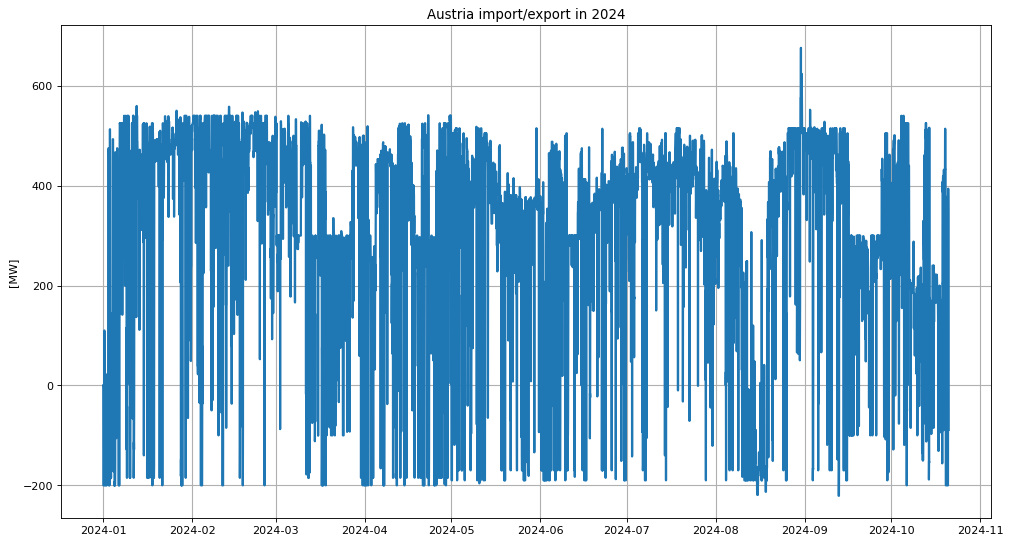

In [72]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2) 

ax.set_title("Austria import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

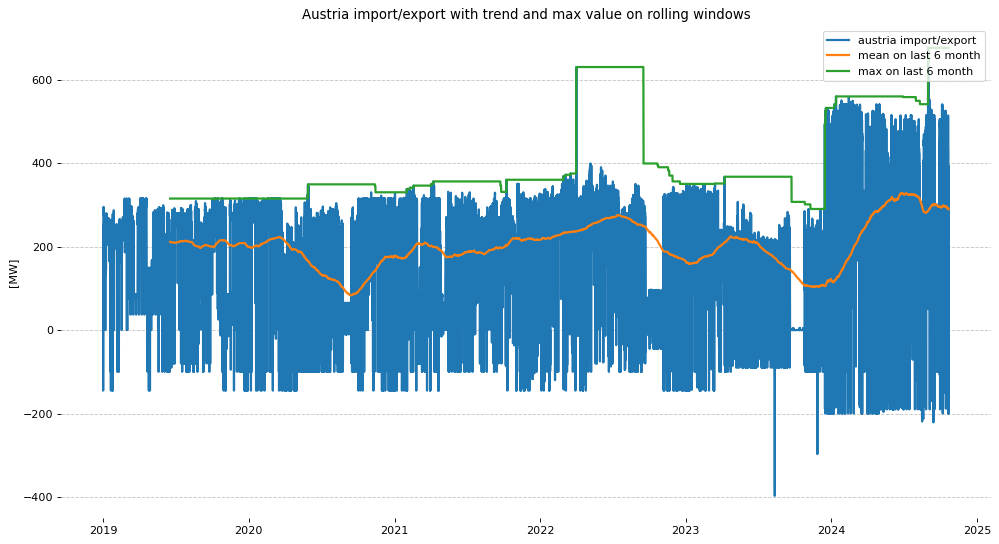

In [73]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'austria import/export') 
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Austria import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### CORSICA

In [74]:
corsica_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Corsica')
corsica_scheduled = corsica_scheduled.drop(columns=['COUNTRY'])
corsica_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-148.0
2019-01-01 01:00:00,-148.0
2019-01-01 02:00:00,-139.0
2019-01-01 03:00:00,-132.0
2019-01-01 04:00:00,-128.0
...,...
2024-10-20 19:00:00,-50.0
2024-10-20 20:00:00,-47.0
2024-10-20 21:00:00,-39.0


In [75]:
print("Macro-scale descriptive stats: CORSICA")
print(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: CORSICA
count    50874.000000
mean       -88.390475
std         37.127147
min       -148.000000
25%       -115.000000
50%        -92.000000
75%        -64.000000
max          0.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



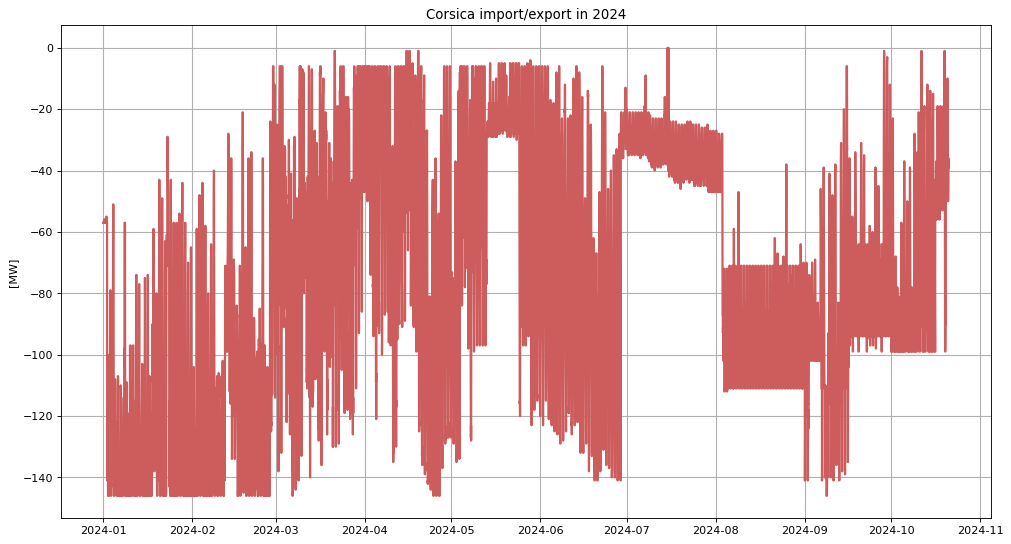

In [76]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'indianred') 

ax.set_title("Corsica import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

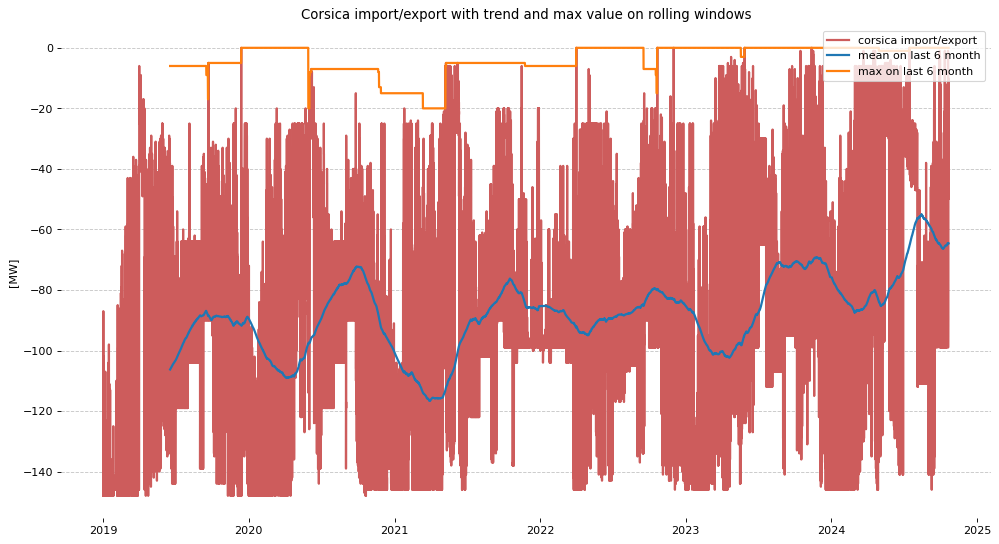

In [77]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'corsica import/export', color = 'indianred') 
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Corsica import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### FRANCE

In [78]:
france_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'France')
france_scheduled = france_scheduled.drop(columns=['COUNTRY'])
france_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-456.0
2019-01-01 01:00:00,-709.0
2019-01-01 02:00:00,-52.0
2019-01-01 03:00:00,-9.0
2019-01-01 04:00:00,-1160.0
...,...
2024-10-20 19:00:00,3692.0
2024-10-20 20:00:00,3692.0
2024-10-20 21:00:00,3160.0


In [79]:
print("Macro-scale descriptive stats: FRANCE")
print(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: FRANCE
count    50874.000000
mean      2104.114100
std       1106.528572
min      -1660.000000
25%       1544.000000
50%       2364.000000
75%       2867.000000
max       4947.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



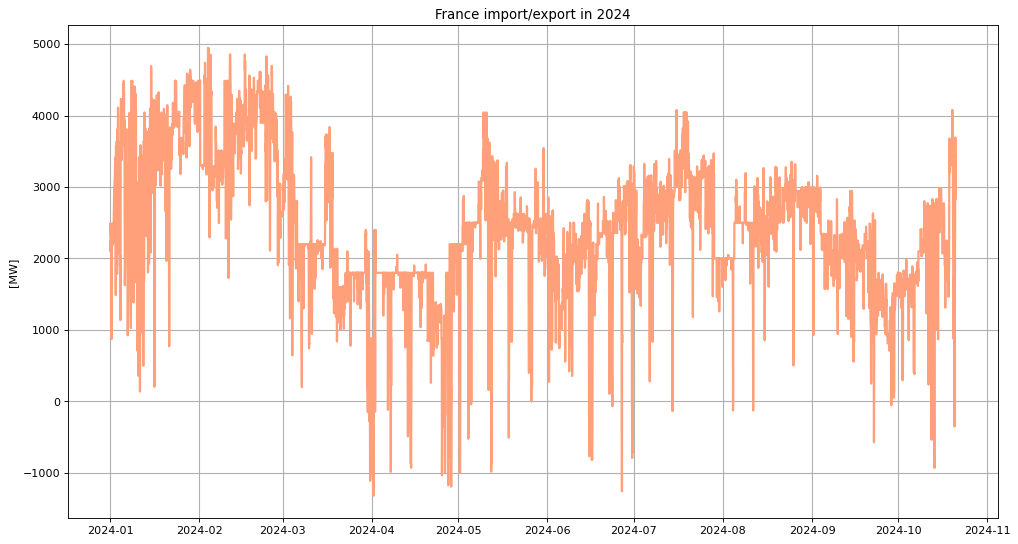

In [80]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'lightsalmon') 

ax.set_title("France import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

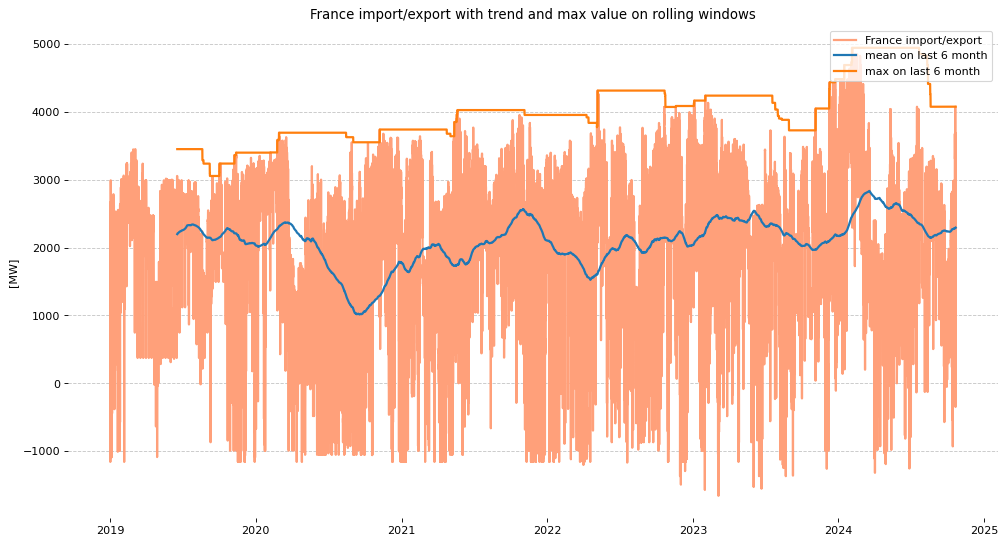

In [81]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'France import/export', color = 'lightsalmon') 
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("France import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### SLOVENIA

In [82]:
slovenia_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Slovenia')
slovenia_scheduled = slovenia_scheduled.drop(columns=['COUNTRY'])
slovenia_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-377.0
2019-01-01 01:00:00,-214.0
2019-01-01 02:00:00,-561.0
2019-01-01 03:00:00,-184.0
2019-01-01 04:00:00,433.0
...,...
2024-10-20 19:00:00,-680.0
2024-10-20 20:00:00,-680.0
2024-10-20 21:00:00,-680.0


In [83]:
print("Macro-scale descriptive stats: SLOVENIA")
print(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: SLOVENIA
count    50874.000000
mean       241.820861
std        428.031263
min      -1116.000000
25%         -6.675000
50%        403.000000
75%        580.000000
max       1119.700000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



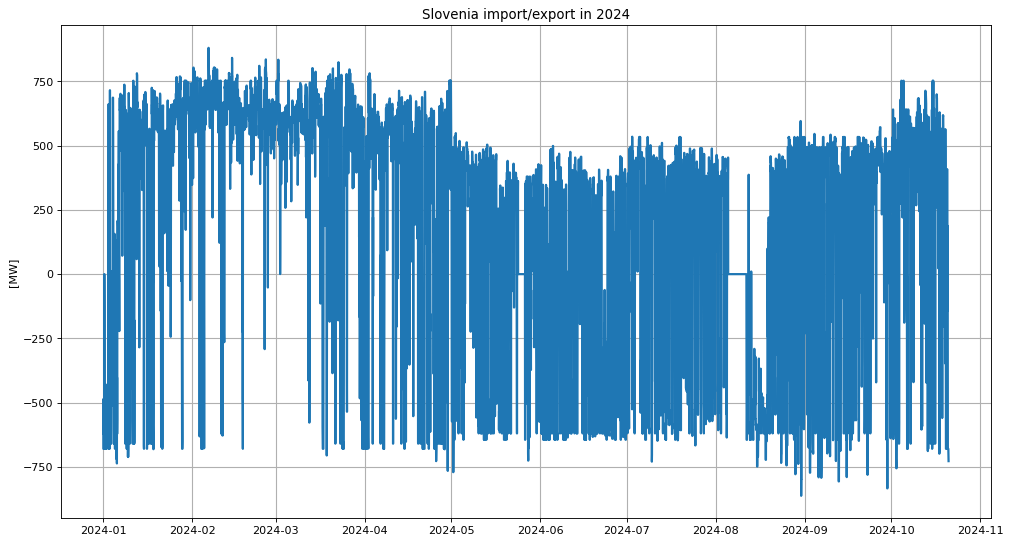

In [84]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2) 

ax.set_title("Slovenia import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

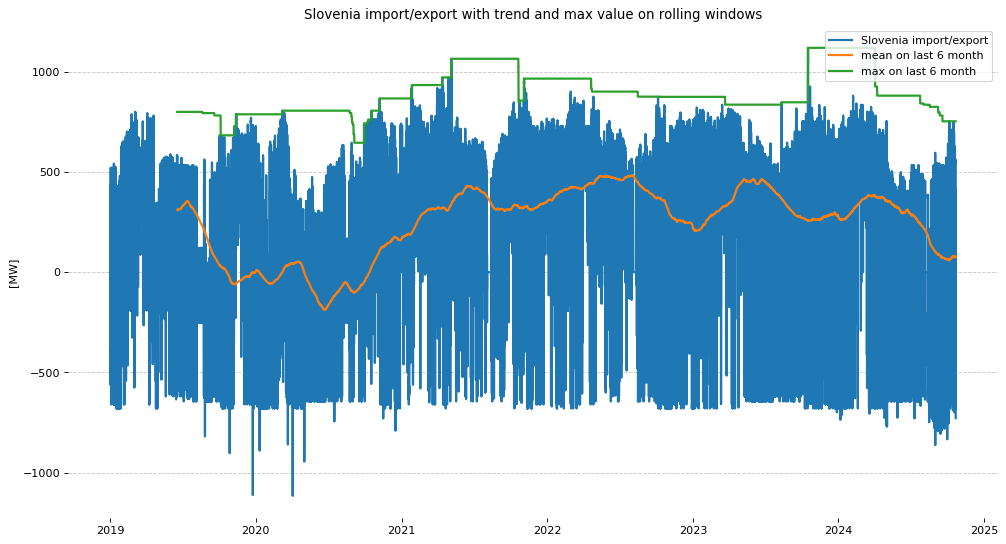

In [85]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'Slovenia import/export') 
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Slovenia import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### GREECE

In [86]:
greece_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Greece')
greece_scheduled = greece_scheduled.drop(columns=['COUNTRY'])
greece_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-310.0
2019-01-01 01:00:00,-298.0
2019-01-01 02:00:00,-216.0
2019-01-01 03:00:00,-211.0
2019-01-01 04:00:00,-206.0
...,...
2024-10-20 19:00:00,-322.7
2024-10-20 20:00:00,-40.2
2024-10-20 21:00:00,500.0


In [87]:
print("Macro-scale descriptive stats: GREECE")
print(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: GREECE
count    50874.000000
mean        -6.278516
std        379.021987
min       -594.700000
25%       -403.000000
50%          0.000000
75%        437.475000
max       1027.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



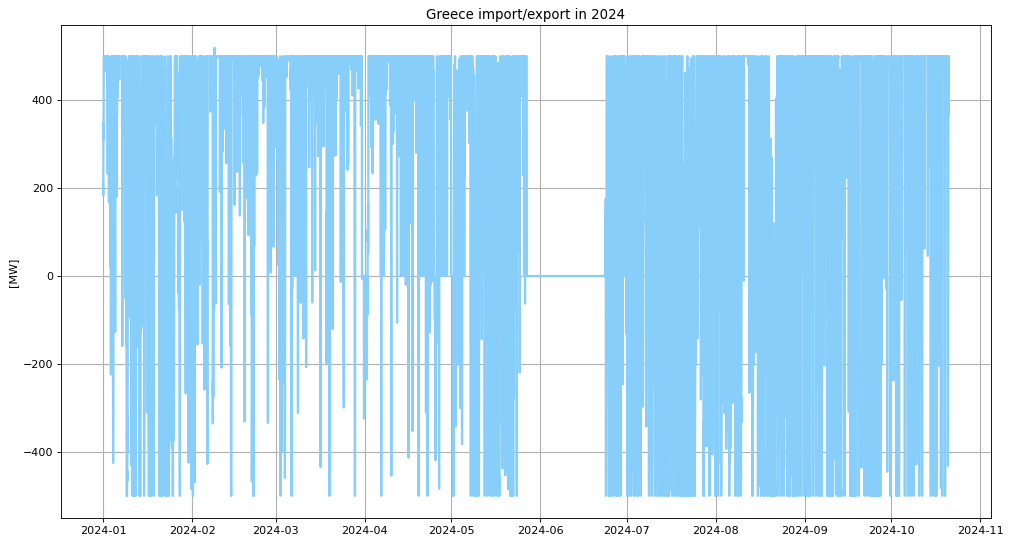

In [88]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'lightskyblue') 

ax.set_title("Greece import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

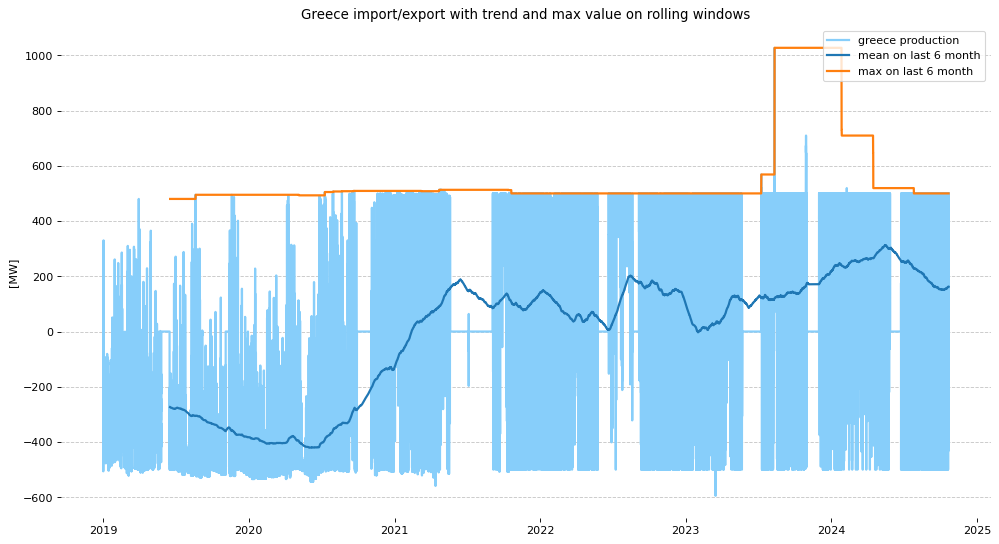

In [89]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'greece production', color = 'lightskyblue') 
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Greece import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### SWITZERLAND

In [90]:
switzerland_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Switzerland')
switzerland_scheduled = switzerland_scheduled.drop(columns=['COUNTRY'])
switzerland_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,2413.0
2019-01-01 01:00:00,2217.0
2019-01-01 02:00:00,1956.0
2019-01-01 03:00:00,2162.0
2019-01-01 04:00:00,2227.0
...,...
2024-10-20 19:00:00,2325.0
2024-10-20 20:00:00,2494.0
2024-10-20 21:00:00,2103.0


In [91]:
print("Macro-scale descriptive stats: SWITZERLAND")
print(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: SWITZERLAND
count    50874.000000
mean      2277.471547
std       1037.972865
min      -1910.000000
25%       1680.000000
50%       2363.000000
75%       2940.000000
max       4977.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



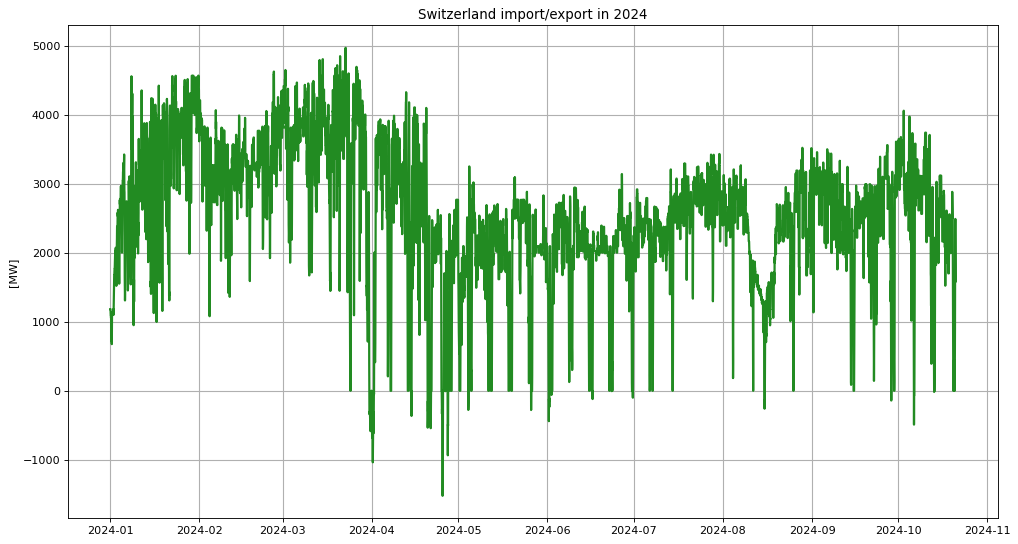

In [92]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'forestgreen') 

ax.set_title("Switzerland import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

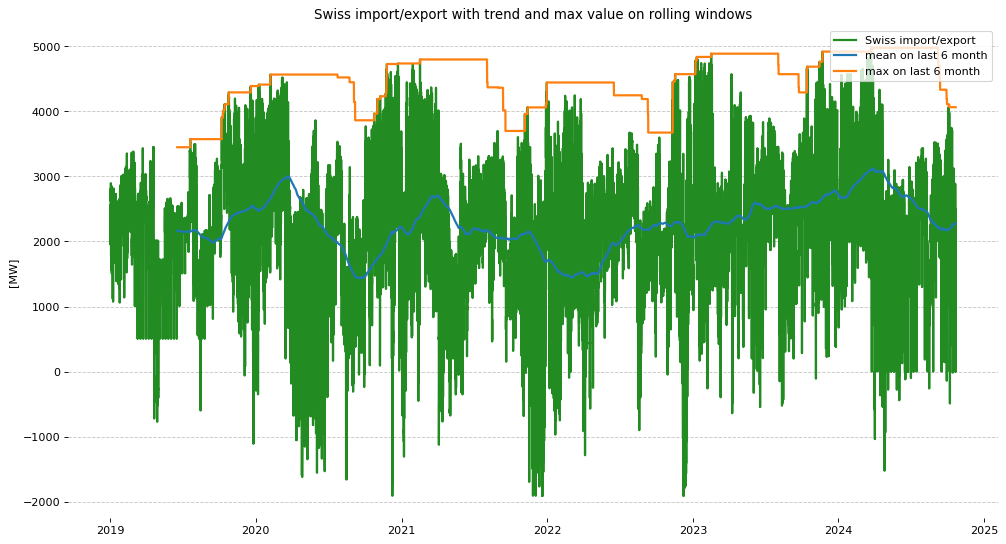

In [93]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'Swiss import/export', color = 'forestgreen') 
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Swiss import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

# Scheduled internal exchange
The following dataset (TERNA_SUNSET_SCHEDULED_INTERNAL_EXCHANGE) deals with the scheduled trade between Italian market zones. Every day the hourly trade programme between market areas is published

In [94]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SCHEDULED_INTERNAL_EXCHANGE"
scheduled_internal = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
scheduled_internal = scheduled_internal.sort_values(by='ORAINI')

scheduled_internal

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,FLOW_FROM,FLOW_TO,SCHEDULED_INTERNAL_EXCHANGE_MW,LOADTIME
0,201901010000,20190101,1,CNOR,NORD,635.15,2024-10-17 15:14:38.297
1,201901010000,20190101,1,CSUD,CNOR,1815.90,2024-10-17 15:14:38.297
2,201901010000,20190101,1,SARD,CSUD,317.22,2024-10-17 15:14:38.297
3,201901010000,20190101,1,SUD,CSUD,2870.00,2024-10-17 15:14:38.297
4,201901010000,20190101,1,SUD,SICI,365.64,2024-10-17 15:14:38.297
...,...,...,...,...,...,...,...
220678,202410202300,20241020,24,SARD,CSUD,95.76,2024-10-21 07:35:08.683
220679,202410202300,20241020,24,SICI,CALA,100.00,2024-10-21 07:35:08.683
220676,202410202300,20241020,24,CALA,SUD,33.29,2024-10-21 07:35:08.683
220677,202410202300,20241020,24,SARD,CNOR,0.00,2024-10-21 07:35:08.683


In [95]:
# Filter the DataFrame for the relevant columns and rows
scheduled_internal = scheduled_internal[['SCHEDULED_INTERNAL_EXCHANGE_MW', 'ORAINI', 'FLOW_FROM', 'FLOW_TO']]
# Convert ORAINI to datetime using the correct method
scheduled_internal['ORAINI'] = pd.to_datetime(scheduled_internal['ORAINI'], format='%Y%m%d%H%M')
scheduled_internal.set_index('ORAINI', inplace=True)

scheduled_internal

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_7632\3452006321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scheduled_internal['ORAINI'] = pd.to_datetime(scheduled_internal['ORAINI'], format='%Y%m%d%H%M')


,SCHEDULED_INTERNAL_EXCHANGE_MW,FLOW_FROM,FLOW_TO
ORAINI,,,
2019-01-01 00:00:00,635.15,CNOR,NORD
2019-01-01 00:00:00,1815.90,CSUD,CNOR
2019-01-01 00:00:00,317.22,SARD,CSUD
2019-01-01 00:00:00,2870.00,SUD,CSUD
2019-01-01 00:00:00,365.64,SUD,SICI
...,...,...,...
2024-10-20 23:00:00,95.76,SARD,CSUD
2024-10-20 23:00:00,100.00,SICI,CALA
2024-10-20 23:00:00,33.29,CALA,SUD


In [96]:
filtered_data = scheduled_internal[(scheduled_internal['FLOW_FROM'] == 'CNOR') & (scheduled_internal['FLOW_TO'] == 'NORD')]
filtered_data = filtered_data['SCHEDULED_INTERNAL_EXCHANGE_MW'] 
filtered_data

ORAINI
2019-01-01 00:00:00     635.15
2019-01-01 01:00:00     940.59
2019-01-01 02:00:00    1372.39
2019-01-01 03:00:00    1617.07
2019-01-01 04:00:00    1921.50
                        ...   
2024-10-20 12:00:00     453.66
2024-10-20 13:00:00     738.73
2024-10-20 14:00:00     936.56
2024-10-20 15:00:00     853.28
2024-10-20 16:00:00     538.14
Name: SCHEDULED_INTERNAL_EXCHANGE_MW, Length: 17722, dtype: float64

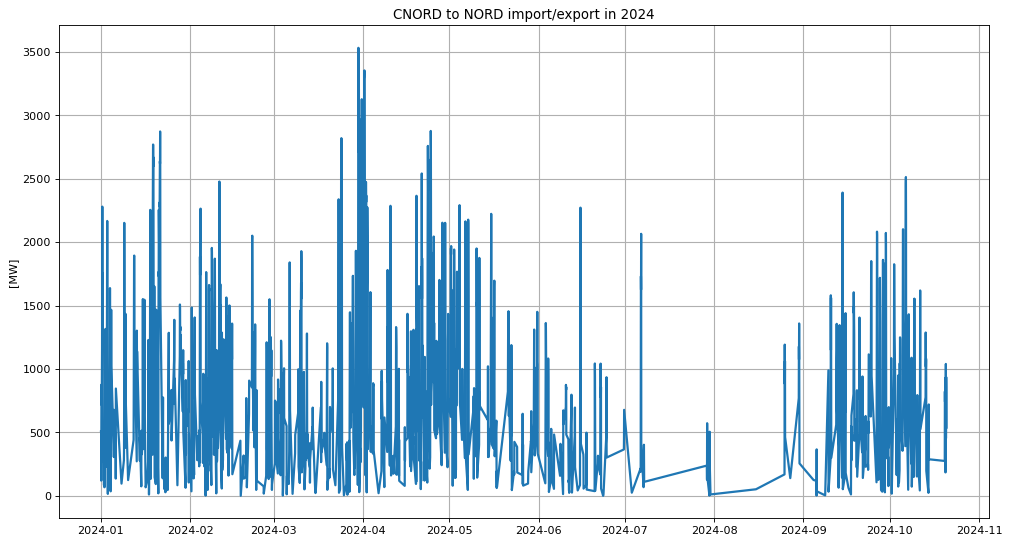

In [97]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(filtered_data.loc["2024"], linewidth=2) 

ax.set_title("CNORD to NORD import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

# Physical Foreign flow

In [98]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_PHYSICAL_FOREIGN_FLOW" 
physical_forex = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
physical_forex = physical_forex.sort_values(by='ORAINI')

physical_forex

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,COUNTRY,IMPORT,EXPORT,PHYSICAL_FOREIGN_FLOW_MW,LOADTIME
0,201901010000,20190101,1,Austria,156.0,0.0,156.0,2024-10-17 15:56:56.080
1,201901010000,20190101,1,Corsica,0.0,142.0,-142.0,2024-10-17 15:56:56.080
2,201901010000,20190101,1,France,175.0,497.0,-321.0,2024-10-17 15:56:56.080
3,201901010000,20190101,1,Greece,0.0,313.0,-313.0,2024-10-17 15:56:56.080
4,201901010000,20190101,1,Malta,0.0,80.0,-80.0,2024-10-17 15:56:56.080
...,...,...,...,...,...,...,...,...
398347,202410202300,20241020,24,France,1674.0,0.0,1674.0,2024-10-21 06:40:06.260
398348,202410202300,20241020,24,Greece,498.0,0.0,498.0,2024-10-21 06:40:06.260
398349,202410202300,20241020,24,Malta,0.0,61.0,-61.0,2024-10-21 06:40:06.260
398350,202410202300,20241020,24,Montenegro,601.0,0.0,601.0,2024-10-21 06:40:06.260


In [99]:
# Filter the DataFrame for the relevant columns and rows
physical_forex = physical_forex[['PHYSICAL_FOREIGN_FLOW_MW', 'ORAINI', 'COUNTRY']]
# Convert ORAINI to datetime using the correct method
physical_forex['ORAINI'] = pd.to_datetime(physical_forex['ORAINI'], format='%Y%m%d%H%M')
physical_forex.set_index('ORAINI', inplace=True)

physical_forex

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_7632\701593090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_forex['ORAINI'] = pd.to_datetime(physical_forex['ORAINI'], format='%Y%m%d%H%M')


,PHYSICAL_FOREIGN_FLOW_MW,COUNTRY
ORAINI,,
2019-01-01 00:00:00,156.0,Austria
2019-01-01 00:00:00,-142.0,Corsica
2019-01-01 00:00:00,-321.0,France
2019-01-01 00:00:00,-313.0,Greece
2019-01-01 00:00:00,-80.0,Malta
...,...,...
2024-10-20 23:00:00,1674.0,France
2024-10-20 23:00:00,498.0,Greece
2024-10-20 23:00:00,-61.0,Malta


In [100]:
# Get unique labels of the COUNTRY
unique_country_label = physical_forex['COUNTRY'].unique()

# Convert to list if needed
country_list = unique_country_label.tolist()

# Display the unique energy sources
print(country_list)

['Austria', 'Corsica', 'France', 'Greece', 'Malta', 'Slovenia', 'Switzerland', 'Montenegro']


In [101]:
austria_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Austria')
austria_physical = austria_physical.drop(columns=['COUNTRY'])

corsica_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Corsica')
corsica_physical = corsica_physical.drop(columns=['COUNTRY'])

france_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'France')
france_physical = france_physical.drop(columns=['COUNTRY'])

greece_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Greece')
greece_physical = greece_physical.drop(columns=['COUNTRY'])

malta_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Malta')
malta_physical = malta_physical.drop(columns=['COUNTRY'])

slovenia_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Slovenia')
slovenia_physical = slovenia_physical.drop(columns=['COUNTRY'])

switzerland_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Switzerland')
switzerland_physical = switzerland_physical.drop(columns=['COUNTRY'])

montenegno_physical = utils.filter_scheduled_foreign_exchange(physical_forex, 'Montenegno')
montenegno_physical = montenegno_physical.drop(columns=['COUNTRY'])

# Physical internal flow

In [102]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_PHYSICAL_INTERNAL_FLOW"
physical_internal = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
physical_internal = physical_internal.sort_values(by='ORAINI')

physical_internal

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,FLOW_FROM,FLOW_TO,PHYSICAL_INTERNAL_FLOW_MW,LOADTIME
0,201901010000,20190101,1,CNOR,NORD,-9.223372e+14,2024-10-17 15:45:01.353
1,201901010000,20190101,1,CSUD,CNOR,-9.223372e+14,2024-10-17 15:45:01.353
2,201901010000,20190101,1,SARD,CNOR,-9.223372e+14,2024-10-17 15:45:01.353
3,201901010000,20190101,1,SARD,CSUD,-9.223372e+14,2024-10-17 15:45:01.353
4,201901010000,20190101,1,SUD,CSUD,-9.223372e+14,2024-10-17 15:45:01.353
...,...,...,...,...,...,...,...
338570,202410202300,20241020,24,CNOR,NORD,-1.054416e+03,2024-10-21 06:45:11.623
338571,202410202300,20241020,24,CSUD,CNOR,-5.345590e+02,2024-10-21 06:45:11.623
338572,202410202300,20241020,24,SARD,CNOR,1.937300e+01,2024-10-21 06:45:11.623
338573,202410202300,20241020,24,SARD,CSUD,2.995950e+02,2024-10-21 06:45:11.623


In [104]:
# Filter the DataFrame for the relevant columns and rows
physical_internal = physical_internal[['PHYSICAL_INTERNAL_FLOW_MW', 'ORAINI', 'FLOW_FROM', 'FLOW_TO']]
# Convert ORAINI to datetime using the correct method
physical_internal['ORAINI'] = pd.to_datetime(physical_internal['ORAINI'], format='%Y%m%d%H%M')
physical_internal.set_index('ORAINI', inplace=True)

print(physical_internal)

,PHYSICAL_INTERNAL_FLOW_MW,FLOW_FROM,FLOW_TO
ORAINI,,,
2019-01-01 00:00:00,-9.223372e+14,CNOR,NORD
2019-01-01 00:00:00,-9.223372e+14,CSUD,CNOR
2019-01-01 00:00:00,-9.223372e+14,SARD,CNOR
2019-01-01 00:00:00,-9.223372e+14,SARD,CSUD
2019-01-01 00:00:00,-9.223372e+14,SUD,CSUD
...,...,...,...
2024-10-20 23:00:00,-1.054416e+03,CNOR,NORD
2024-10-20 23:00:00,-5.345590e+02,CSUD,CNOR
2024-10-20 23:00:00,1.937300e+01,SARD,CNOR
